##  数据预处理
* StandardScaler  均值0，1标准差
* MinMaxScaler [0,1]
* MaxAbsScaler [-1,1] 无偏移
* RobustScaler 有异常值的特征

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import datasets, preprocessing


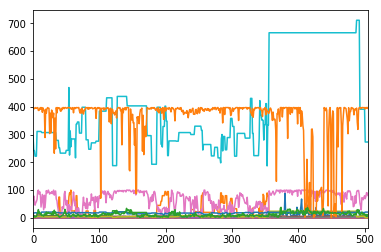

In [4]:
boston = datasets.load_boston()
df = pd.DataFrame(data = boston.data, columns = list(boston.feature_names))
df.plot(legend = False)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


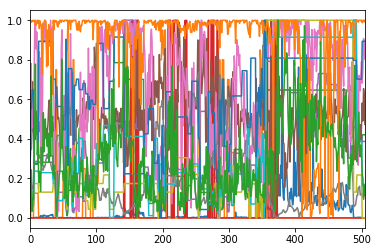

In [8]:
minmaxscaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
minmaxscaler.fit(df.values)
data = minmaxscaler.transform(df.values)
dfScaled = pd.DataFrame(data, columns = list(boston.feature_names))
dfScaled.plot(legend = False)

In [9]:
#异常值
x = np.array([10, 1000, 0, 0, -10, 10, 0, -10])
x = x.reshape(-1, 1)

In [12]:
robustScaler = preprocessing.RobustScaler(with_centering=True, with_scaling=True, 
                                         quantile_range=(25.0, 75.0), copy=True)
print(robustScaler.fit_transform(x))

[[ 0.8]
 [80. ]
 [ 0. ]
 [ 0. ]
 [-0.8]
 [ 0.8]
 [ 0. ]
 [-0.8]]


In [13]:
#系数矩阵
y = np.array([0]*95 +[0, 3, 23, 44, 2]) 
y = y.reshape(-1, 1)

In [16]:
maxabsScaler = preprocessing.MaxAbsScaler(copy=True)
z = maxabsScaler.fit_transform(y)
print(z[-10:])

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.06818182]
 [0.52272727]
 [1.        ]
 [0.04545455]]


## 二，正则化
> 正则化是对样本（行）来说的，而标准化是对每一列来说的。
> 正则化也叫归一化，是缩放单个样本使其具有单位范数的过程
> 如果你计划使用二次形式（点积或其他核函数）来量化样本之间的距离，此过程非常有用

In [17]:
#preprocessing.normalize(x, norm='l1')
#normer =  preprocessing.Normalizer(norm='l1')
# normer.fit_transform(x)

## 三，特征的二值化

In [24]:
X = [[-1., -1., 3.],
     [1., 0., 2.],
     [2., 3., -1.]]


In [26]:
binarizer =  preprocessing.Binarizer(threshold=1.1)
Y = binarizer.fit_transform(X)
Y

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 1., 0.]])

## 四，分类特征编码

In [8]:
onehot = preprocessing.OneHotEncoder()
X = [[0, 0, 3],[1, 1, 0],[0, 3, 1],[1, 0, 2]]
onehot.fit_transform(X).toarray() #将稀疏矩阵转换为不同矩阵

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

In [9]:
# 如果有缺失的分类特征值，需要显示地设置n_values
onehot = preprocessing.OneHotEncoder(n_values=[2,4,4])
onehot.fit_transform(X).toarray() 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)


array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1., 0.]])

## 五，缺失值

In [10]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit([[1,2],[np.nan, 3],[7, 6]])
#fit求得每一列的均值4, 11/3
X = [[np.nan, 2],[6, np.nan],[7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## 六，生成多项式的特征
提升模型复杂度

In [13]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape((3,2))
poly = PolynomialFeatures(2)
print(X)
print(poly.fit_transform(X))#(x1, x2) ==> (1, x1,x2,x1^2, x1x2, x2^2)

[[0 1]
 [2 3]
 [4 5]]
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


In [14]:
#(x1, x2) ==> (1, x1,x2,x1x2)
poly = PolynomialFeatures(2, interaction_only=True)
print(poly.fit_transform(X))

[[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]
